In [1]:
library("ggplot2")
library(maps)
library(mapdata)
library(dplyr)
library(zoo)

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [2]:
theme_replace(legend.position = "top")

In [3]:
airline_delay_causes <- read.csv(file = 'Airlines/airline_delay_causes.csv')
airports <- read.csv(file = 'Airlines/airports.csv')
carriers <- read.csv(file = 'Airlines/carriers.csv')
plane_data <- read.csv(file = 'Airlines/plane-data.csv')

## Let's take a look at our data

In [4]:
head(airline_delay_causes)

year,X.month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,X.weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,X.arr_delay,X.carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,X
2003,6,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sunport",307,56,14.68,10.79,...,9.96,1,1,2530,510,621,676,25,698,NA
2003,6,AA,American Airlines Inc.,ANC,"Anchorage, AK: Ted Stevens Anchorage International",90,27,7.09,2.00,...,7.16,0,0,1390,271,83,581,0,455,NA
2003,6,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta International",752,186,33.99,27.82,...,17.53,5,0,8314,1367,1722,3817,139,1269,NA
2003,6,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",842,174,60.24,20.54,...,40.75,9,1,8344,3040,1032,1835,115,2322,NA
2003,6,AA,American Airlines Inc.,BDL,"Hartford, CT: Bradley International",383,55,14.90,8.91,...,16.61,0,0,3137,815,574,555,0,1193,NA
2003,6,AA,American Airlines Inc.,BHM,"Birmingham, AL: Birmingham-Shuttlesworth International",89,12,2.79,2.19,...,3.82,0,0,673,94,90,50,35,404,NA


In [5]:
head(airports)

iata,airport,city,state,country,lat,long
00M,Thigpen,Bay Springs,MS,USA,31.95376,-89.23450
00R,Livingston Municipal,Livingston,TX,USA,30.68586,-95.01793
00V,Meadow Lake,Colorado Springs,CO,USA,38.94575,-104.56989
01G,Perry-Warsaw,Perry,NY,USA,42.74135,-78.05208
01J,Hilliard Airpark,Hilliard,FL,USA,30.68801,-81.90594
01M,Tishomingo County,Belmont,MS,USA,34.49167,-88.20111


In [6]:
head(carriers)

Code,Description
02Q,Titan Airways
04Q,Tradewind Aviation
05Q,"Comlux Aviation, AG"
06Q,Master Top Linhas Aereas Ltd.
07Q,Flair Airlines Ltd.
09Q,"Swift Air, LLC"


In [7]:
tail(plane_data)

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
5024,N997AT,Corporation,BOEING,01/02/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5025,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5026,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5027,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5028,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998
5029,N999DN,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992


## Merge airline delays and airports by the iata codes 

In [102]:
df <- merge(airline_delay_causes, airports, by.x="airport", by.y="iata")
df <- filter(df, country == 'USA' & state != 'AK' & state != 'PR' & #state != 'HI' & 
             state != 'VI' & state != 'GU')

In [9]:
head(df)

airport,year,X.month,carrier,carrier_name,airport_name,arr_flights,arr_del15,carrier_ct,X.weather_ct,...,nas_delay,security_delay,late_aircraft_delay,X,airport.y,city,state,country,lat,long
ABE,2006,11,XE,ExpressJet Airlines Inc.,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",89,5,0.46,0.00,...,25,0,181,NA,Lehigh Valley International,Allentown,PA,USA,40.65236,-75.4404
ABE,2011,8,XE,ExpressJet Airlines Inc.,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",148,37,11.08,0.36,...,813,0,1263,NA,Lehigh Valley International,Allentown,PA,USA,40.65236,-75.4404
ABE,2011,9,FL,AirTran Airways Corporation,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",28,4,0.00,0.00,...,79,0,28,NA,Lehigh Valley International,Allentown,PA,USA,40.65236,-75.4404
ABE,2004,4,US,US Airways Inc.,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",30,4,1.40,0.00,...,3,0,141,NA,Lehigh Valley International,Allentown,PA,USA,40.65236,-75.4404
ABE,2007,2,OO,SkyWest Airlines Inc.,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",77,27,13.00,1.00,...,0,0,810,NA,Lehigh Valley International,Allentown,PA,USA,40.65236,-75.4404
ABE,2006,7,OO,SkyWest Airlines Inc.,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",59,13,5.00,0.00,...,120,0,401,NA,Lehigh Valley International,Allentown,PA,USA,40.65236,-75.4404


## Draw map of the US with airports on it

In [10]:
usa <- map_data("usa")
states <- map_data("state")

In [11]:
plot_map <- function() ggplot(data = states) + 
    geom_polygon(aes(x = long, y = lat, group = group), color = "white") +
    coord_fixed(1.3)

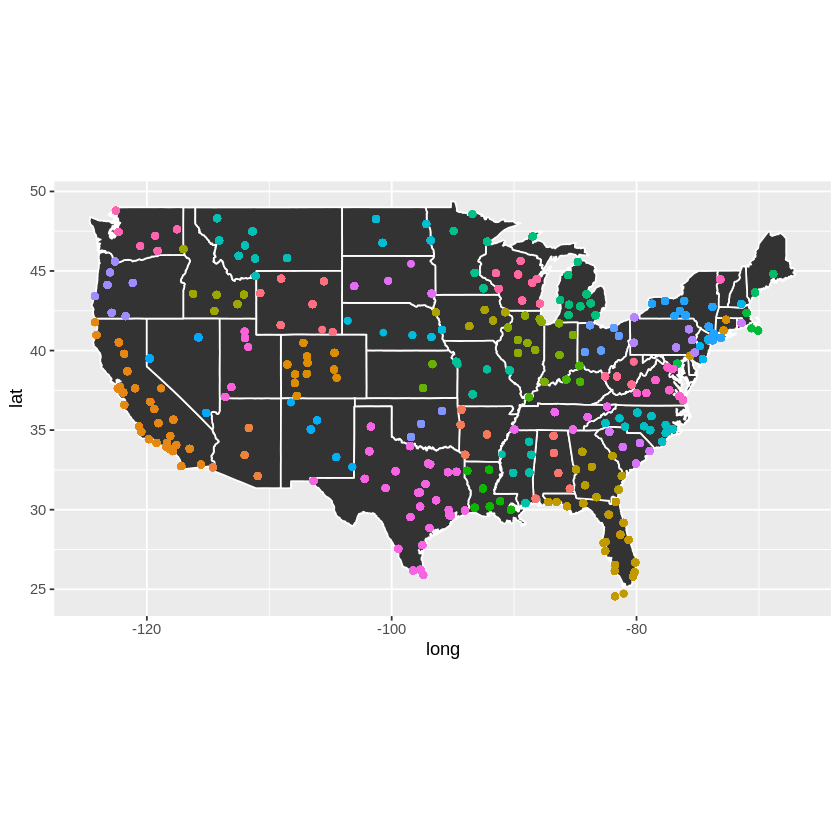

In [12]:
plot_map() +
    geom_point(data = df, mapping = aes(x = long, y = lat, color = state)) +
    guides(fill=FALSE, color = FALSE)

## New columns

In [13]:
add_state_name <- function(dataframe) dataframe %>% mutate(state_name = tolower(state.name[match(state, state.abb)]))

In [14]:
df <- add_state_name(df)

In [113]:
df <- df %>% mutate(year_month = as.Date(as.yearmon(sprintf("%d-%02d", year, X.month))))

## More plots!

In [16]:
head(df)

airport,year,X.month,carrier,carrier_name,airport_name,arr_flights,arr_del15,carrier_ct,X.weather_ct,...,late_aircraft_delay,X,airport.y,city,state,country,lat,long,state_name,year_month
ABE,2006,11,XE,ExpressJet Airlines Inc.,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",89,5,0.46,0.00,...,181,NA,Lehigh Valley International,Allentown,PA,USA,40.65236,-75.4404,pennsylvania,2006-11-01
ABE,2011,8,XE,ExpressJet Airlines Inc.,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",148,37,11.08,0.36,...,1263,NA,Lehigh Valley International,Allentown,PA,USA,40.65236,-75.4404,pennsylvania,2011-08-01
ABE,2011,9,FL,AirTran Airways Corporation,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",28,4,0.00,0.00,...,28,NA,Lehigh Valley International,Allentown,PA,USA,40.65236,-75.4404,pennsylvania,2011-09-01
ABE,2004,4,US,US Airways Inc.,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",30,4,1.40,0.00,...,141,NA,Lehigh Valley International,Allentown,PA,USA,40.65236,-75.4404,pennsylvania,2004-04-01
ABE,2007,2,OO,SkyWest Airlines Inc.,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",77,27,13.00,1.00,...,810,NA,Lehigh Valley International,Allentown,PA,USA,40.65236,-75.4404,pennsylvania,2007-02-01
ABE,2006,7,OO,SkyWest Airlines Inc.,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",59,13,5.00,0.00,...,401,NA,Lehigh Valley International,Allentown,PA,USA,40.65236,-75.4404,pennsylvania,2006-07-01


In [150]:
df$arr_flights[is.na(df$arr_flights)] <- 0
df$arr_del15[is.na(df$arr_del15)] <- 0
df$carrier_ct[is.na(df$carrier_ct)] <- 0
df$X.weather_ct[is.na(df$X.weather_ct)] <- 0
df$nas_ct[is.na(df$nas_ct)] <- 0
df$security_ct[is.na(df$security_ct)] <- 0
df$late_aircraft_ct[is.na(df$late_aircraft_ct)] <- 0
df$arr_cancelled[is.na(df$arr_cancelled)] <- 0
df$arr_diverted[is.na(df$arr_diverted)] <- 0
df$X.arr_delay[is.na(df$X.arr_delay)] <- 0

In [18]:
colnames(df)

[1] "airport"             "year"                "X.month"            
 [4] "carrier"             "carrier_name"        "airport_name"       
 [7] "arr_flights"         "arr_del15"           "carrier_ct"         
[10] "X.weather_ct"        "nas_ct"              "security_ct"        
[13] "late_aircraft_ct"    "arr_cancelled"       "arr_diverted"       
[16] "X.arr_delay"         "X.carrier_delay"     "weather_delay"      
[19] "nas_delay"           "security_delay"      "late_aircraft_delay"
[22] "X"                   "airport.y"           "city"               
[25] "state"               "country"             "lat"                
[28] "long"                "state_name"          "year_month"

In [114]:
df_by_carrier_per_year_month <- df %>% group_by(carrier, carrier_name, year_month) %>%
    summarise(
        total_flights = sum(arr_flights),
        total_delays = sum(arr_del15),
        delayed_ratio = total_delays / total_flights,
        total_carrier_ct = sum(carrier_ct),
        total_weather_ct = sum(X.weather_ct),
        total_nas_ct = sum(nas_ct),
        total_security_ct = sum(security_ct),
        total_late_aircraft_ct = sum(late_aircraft_ct),
        total_cancelled = sum(arr_cancelled),
        cancelled_ratio = total_cancelled / total_flights,
        total_diverted = sum(arr_diverted),
        .groups = "keep"
    ) %>%
    ungroup()

In [151]:
df_by_carrier_per_month <- df %>% group_by(carrier, carrier_name, X.month) %>%
    summarise(
        total_flights = sum(arr_flights),
        total_delays = sum(arr_del15),
        delayed_ratio = total_delays / total_flights,
        total_carrier_ct = sum(carrier_ct),
        total_weather_ct = sum(X.weather_ct),
        total_nas_ct = sum(nas_ct),
        total_security_ct = sum(security_ct),
        total_late_aircraft_ct = sum(late_aircraft_ct),
        total_cancelled = sum(arr_cancelled),
        cancelled_ratio = total_cancelled / total_flights,
        total_diverted = sum(arr_diverted),
        total_delay = sum(X.arr_delay),
        .groups = "keep"
    ) %>%
    ungroup()

In [76]:
df_by_carrier <- df_by_carrier_per_month %>% group_by(carrier, carrier_name) %>%
    summarise(
        total_flights = sum(total_flights),
        total_delays = sum(total_delays),
        delayed_ratio = sum(total_delays) / sum(total_flights),
        total_carrier_ct = sum(total_carrier_ct),
        total_weather_ct = sum(total_weather_ct),
        total_nas_ct = sum(total_nas_ct),
        total_security_ct = sum(total_security_ct),
        total_late_aircraft_ct = sum(total_late_aircraft_ct),
        total_cancelled = sum(total_cancelled),
        cancelled_ratio = sum(total_cancelled) / sum(total_flights),
        total_diverted = sum(total_diverted),
        .groups = "keep"
    ) %>%
    ungroup()

In [106]:
df_by_airport <- df %>% group_by(state, city, airport) %>% 
    summarise(
        total_flights = sum(arr_flights),
        total_delays = sum(arr_del15),
        delayed_ratio = total_delays / total_flights,
        total_carrier_ct = sum(carrier_ct),
        total_weather_ct = sum(X.weather_ct),
        total_nas_ct = sum(nas_ct),
        total_security_ct = sum(security_ct),
        total_late_aircraft_ct = sum(late_aircraft_ct),
        total_cancelled = sum(arr_cancelled),
        cancelled_ratio = total_cancelled / total_flights,
        total_diverted = sum(arr_diverted),
        .groups = "keep"
    ) %>%
    ungroup()
df_by_airport <- merge(df_by_airport, airports[, c("iata", "lat", "long")], by.x="airport", by.y="iata")
df_by_airport <- add_state_name(df_by_airport)

In [21]:
df_by_state <- df_by_airport %>% group_by(state) %>%
    summarise(
        total_flights = sum(total_flights),
        total_delays = sum(total_delays),
        delayed_ratio = sum(total_delays) / sum(total_flights),
        total_carrier_ct = sum(total_carrier_ct),
        total_weather_ct = sum(total_weather_ct),
        total_nas_ct = sum(total_nas_ct),
        total_security_ct = sum(total_security_ct),
        total_late_aircraft_ct = sum(total_late_aircraft_ct),
        total_cancelled = sum(total_cancelled),
        cancelled_ratio = sum(total_cancelled) / sum(total_flights),
        total_diverted = sum(total_diverted),
        .groups = "keep"
    ) %>%
    ungroup()
df_by_state <- add_state_name(df_by_state)

In [22]:
head(df_by_airport)

airport,state,city,total_flights,total_delays,delayed_ratio,total_carrier_ct,total_weather_ct,total_nas_ct,total_security_ct,total_late_aircraft_ct,total_cancelled,cancelled_ratio,total_diverted,lat,long,state_name
ABE,PA,Allentown,40966,8734,0.2132012,3478.49,748.90,2071.67,14.52,2420.40,1036,0.025289264,94,40.65236,-75.44040,pennsylvania
ABI,TX,Abilene,22810,5164,0.2263919,2327.51,563.09,771.41,1.84,1500.15,433,0.018982902,19,32.41132,-99.68190,texas
ABQ,NM,Albuquerque,312587,58019,0.1856091,19803.84,1680.68,10920.23,215.35,25399.08,2103,0.006727727,420,35.04022,-106.60919,new mexico
ABR,SD,Aberdeen,5,2,0.4000000,0.00,0.00,1.39,0.00,0.61,1,0.200000000,0,45.44906,-98.42183,south dakota
ABY,GA,Albany,10235,2319,0.2265755,930.65,289.94,562.21,4.46,531.68,279,0.027259404,10,31.53552,-84.19447,georgia
ACK,MA,Nantucket,2610,787,0.3015326,220.82,33.59,308.66,1.80,222.11,192,0.073563218,22,41.25305,-70.06018,massachusetts


In [23]:
head(df_by_carrier_per_month)

carrier,carrier_name,year_month,total_flights,total_delays,delayed_ratio,total_carrier_ct,total_weather_ct,total_nas_ct,total_security_ct,total_late_aircraft_ct,total_cancelled,cancelled_ratio,total_diverted
9E,Pinnacle Airlines Inc.,2007-01-01,21031,4318,0.2053160,1209.91,117.12,1776.54,4.67,1209.82,527,0.02505825,33
9E,Pinnacle Airlines Inc.,2007-02-01,19879,5808,0.2921676,1715.43,171.24,1967.44,3.75,1950.05,1257,0.06323256,58
9E,Pinnacle Airlines Inc.,2007-03-01,22273,3907,0.1754142,1235.11,150.80,1282.55,5.46,1233.10,924,0.04148521,53
9E,Pinnacle Airlines Inc.,2007-04-01,21184,3059,0.1444014,922.49,120.60,1306.06,3.24,706.59,219,0.01033799,65
9E,Pinnacle Airlines Inc.,2007-05-01,21264,3259,0.1532637,971.67,176.90,1289.50,3.75,817.22,162,0.00761851,67
9E,Pinnacle Airlines Inc.,2007-06-01,21786,4692,0.2153677,1469.89,244.05,1630.00,6.41,1341.68,464,0.02129808,63


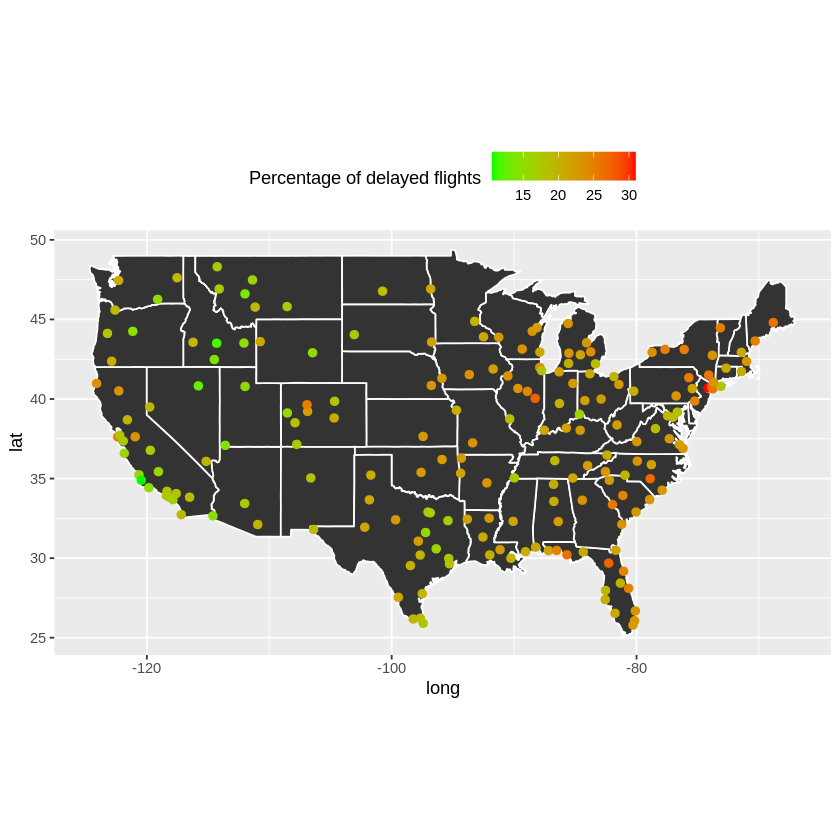

In [47]:
plot_map() +
    geom_point(data = df_by_airport %>% slice_max(total_flights, n = 200), mapping = aes(x = long, y = lat, color = 100 * delayed_ratio), size = 2) +
    scale_color_gradient(low="green", high="red") +
    labs(color = "Percentage of delayed flights")

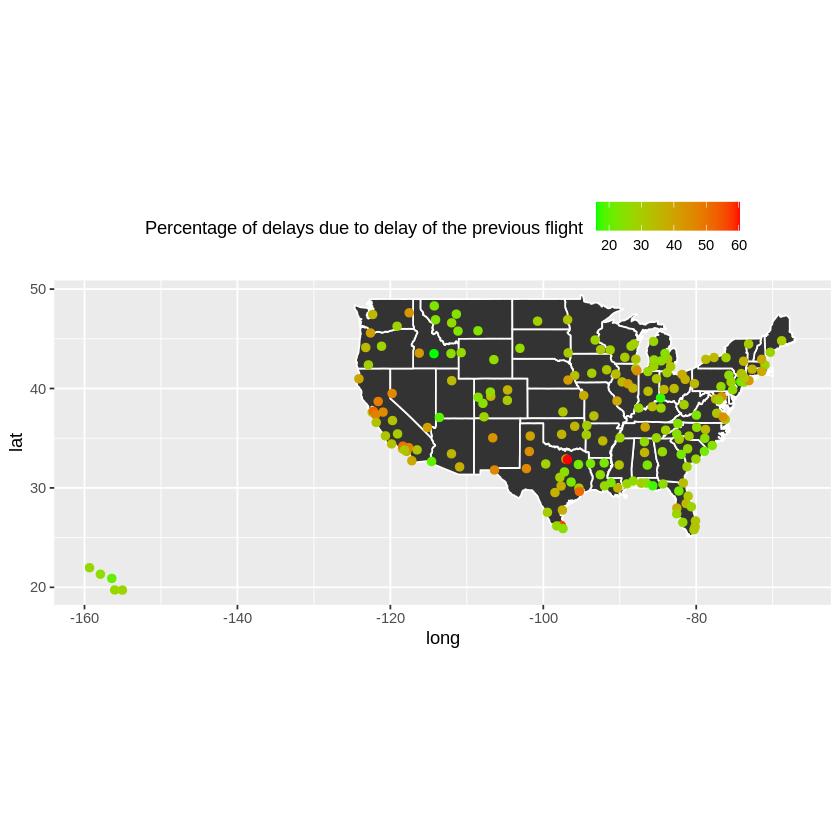

In [107]:
plot_map() +
    geom_point(data = df_by_airport %>% slice_max(total_flights, n = 200), mapping = aes(x = long, y = lat, color = total_late_aircraft_ct / total_delays * 100), size = 2) +
    scale_color_gradient(low="green", high="red") +
    labs(color = "Percentage of delays due to delay of the previous flight")

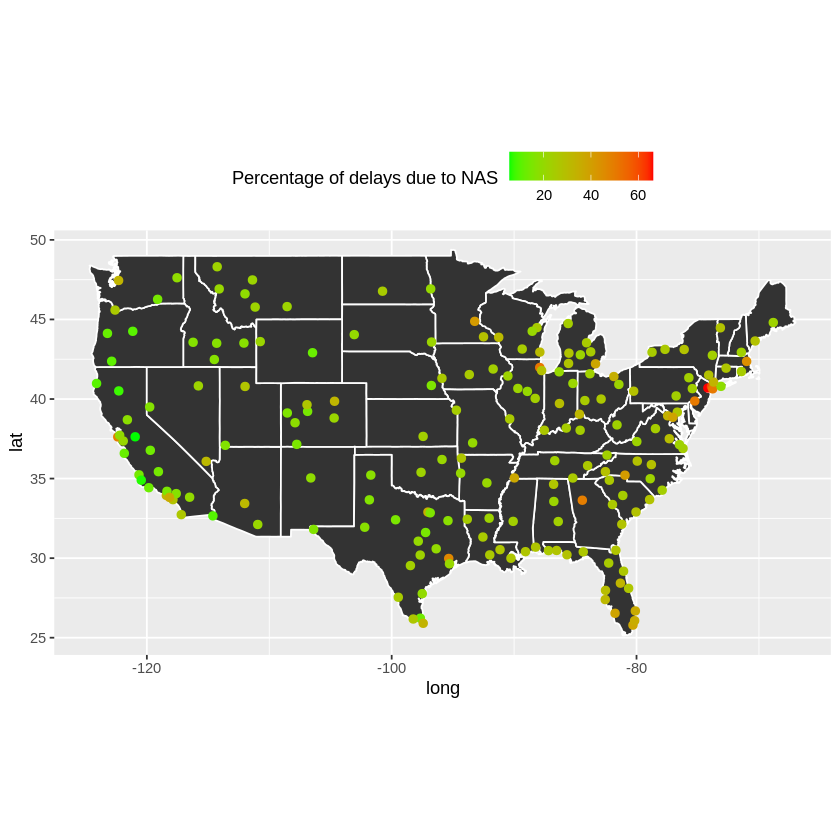

In [49]:
plot_map() +
    geom_point(data = df_by_airport %>% slice_max(total_flights, n = 200), mapping = aes(x = long, y = lat, color = total_nas_ct / total_delays * 100), size = 2) +
    scale_color_gradient(low="green", high="red") +
    guides(fill=FALSE) +
    labs(color = "Percentage of delays due to NAS")

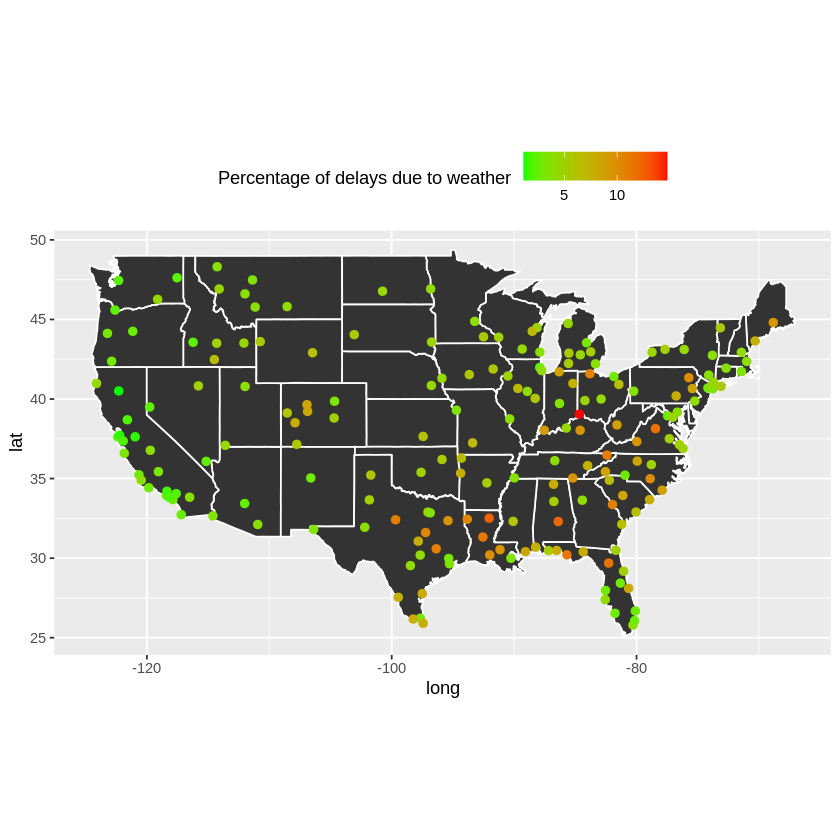

In [50]:
plot_map() +
    geom_point(data = df_by_airport %>% slice_max(total_flights, n = 200), mapping = aes(x = long, y = lat, color = total_weather_ct / total_delays * 100), size = 2) +
    scale_color_gradient(low="green", high="red") +
    guides(fill=FALSE) +
    labs(color = "Percentage of delays due to weather")

In [62]:
df_by_airport %>% slice_max(total_flights, n = 100) %>% slice_max(delayed_ratio, n = 5)

airport,state,city,total_flights,total_delays,delayed_ratio,total_carrier_ct,total_weather_ct,total_nas_ct,total_security_ct,total_late_aircraft_ct,total_cancelled,cancelled_ratio,total_diverted,lat,long,state_name
EWR,NJ,Newark,1180391,365148,0.3093450,38962.92,10610.52,241843.0,692.59,73039.32,37750,0.03198093,4564,40.69250,-74.16866,new jersey
LGA,NY,New York,973992,271173,0.2784140,42749.55,12877.33,162288.2,223.54,53034.64,40937,0.04203012,4522,40.77724,-73.87261,new york
JFK,NY,New York,903250,234512,0.2596313,47956.46,8715.35,118624.6,739.06,58476.82,21700,0.02402436,3577,40.63975,-73.77893,new york
SFO,CA,San Francisco,1140667,291712,0.2557381,62921.45,6827.07,143117.1,675.70,78170.61,20233,0.01773787,1673,37.61900,-122.37484,california
SYR,NY,Syracuse,101266,25630,0.2530958,9785.14,1127.40,7260.9,38.15,7418.50,1867,0.01843659,136,43.11119,-76.10631,new york


In [29]:
head(df_by_state)

state,total_flights,total_delays,delayed_ratio,total_carrier_ct,total_weather_ct,total_nas_ct,total_security_ct,total_late_aircraft_ct,total_cancelled,cancelled_ratio,total_diverted,state_name
AL,362677,76870,0.2119517,29220.34,5660.66,18479.70,231.04,23278.19,7002,0.01930644,604,alabama
AR,286862,64677,0.2254638,24665.29,3914.49,14892.02,120.34,21085.18,7047,0.02456582,738,arkansas
AZ,1817905,311636,0.1714259,97602.47,8260.29,92981.89,1535.21,111256.70,20315,0.01117495,2381,arizona
CA,6754321,1319896,0.1954151,393850.75,31532.08,399651.51,4554.21,490307.55,87063,0.01288997,10831,california
CO,2091542,378780,0.1811008,114986.54,13938.72,115769.45,988.66,133097.56,30854,0.01475180,5003,colorado
CT,254639,54009,0.2121003,18056.44,2003.33,14547.26,79.63,19322.76,4241,0.01665495,359,connecticut


In [30]:
states_with_data <- left_join(states, df_by_state, by = c("region" = "state_name"))

In [31]:
df_by_state %>% slice_max(total_flights, n = 10)

state,total_flights,total_delays,delayed_ratio,total_carrier_ct,total_weather_ct,total_nas_ct,total_security_ct,total_late_aircraft_ct,total_cancelled,cancelled_ratio,total_diverted,state_name
CA,6754321,1319896,0.1954151,393850.75,31532.08,399651.51,4554.21,490307.5,87063,0.01288997,10831,california
TX,6428170,1177691,0.1832078,286200.16,51486.71,382986.66,3395.52,453622.7,109256,0.01699644,22722,texas
IL,3845950,881949,0.2293189,158368.60,25276.96,411491.85,1522.12,285289.5,117584,0.03057346,9968,illinois
FL,3780702,809044,0.2139931,245212.83,29130.68,269326.26,2427.41,262947.6,42663,0.01128441,7368,florida
GA,3641062,838179,0.2302018,176079.47,37250.41,402454.16,909.41,221485.8,74691,0.02051352,8076,georgia
NY,2654020,686096,0.2585120,154106.41,30099.49,327679.54,1338.35,172873.0,77609,0.02924206,9954,new york
CO,2091542,378780,0.1811008,114986.54,13938.72,115769.45,988.66,133097.6,30854,0.01475180,5003,colorado
VA,1937210,388729,0.2006644,112537.05,16410.80,130957.18,730.77,128093.4,50281,0.02595537,4339,virginia
AZ,1817905,311636,0.1714259,97602.47,8260.29,92981.89,1535.21,111256.7,20315,0.01117495,2381,arizona
NC,1700285,350596,0.2061984,104880.80,15023.09,123254.13,668.24,106769.5,31667,0.01862452,2736,north carolina


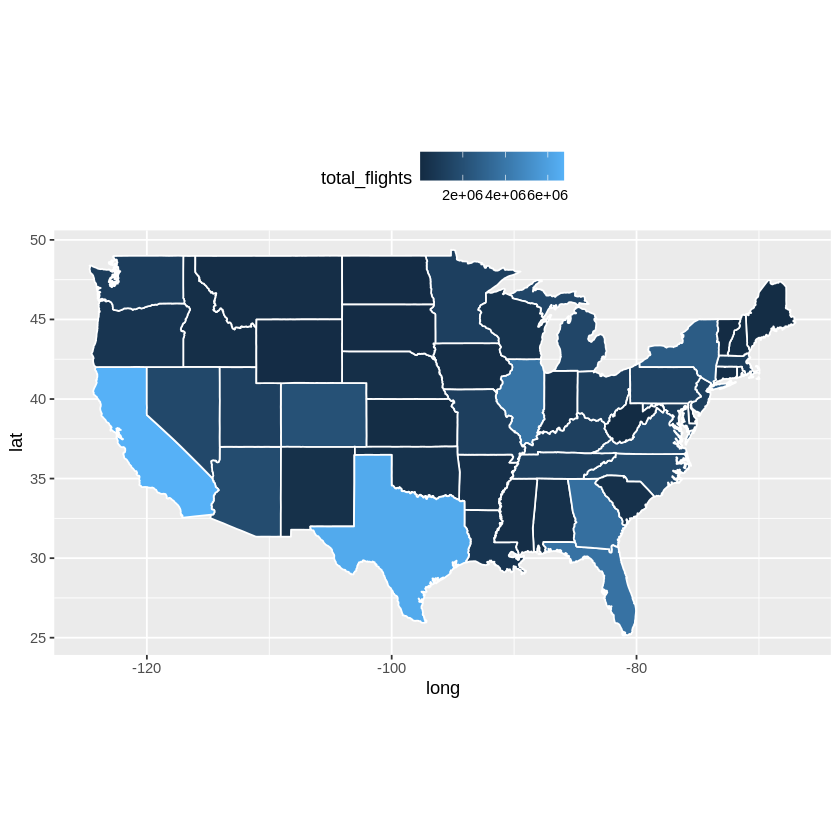

In [32]:
ggplot(data = states_with_data) +
    geom_polygon(aes(x = long, y = lat, group = group, fill = total_flights), color = "white") +
    coord_fixed(1.3) +
    labs(fill = "Total flights")

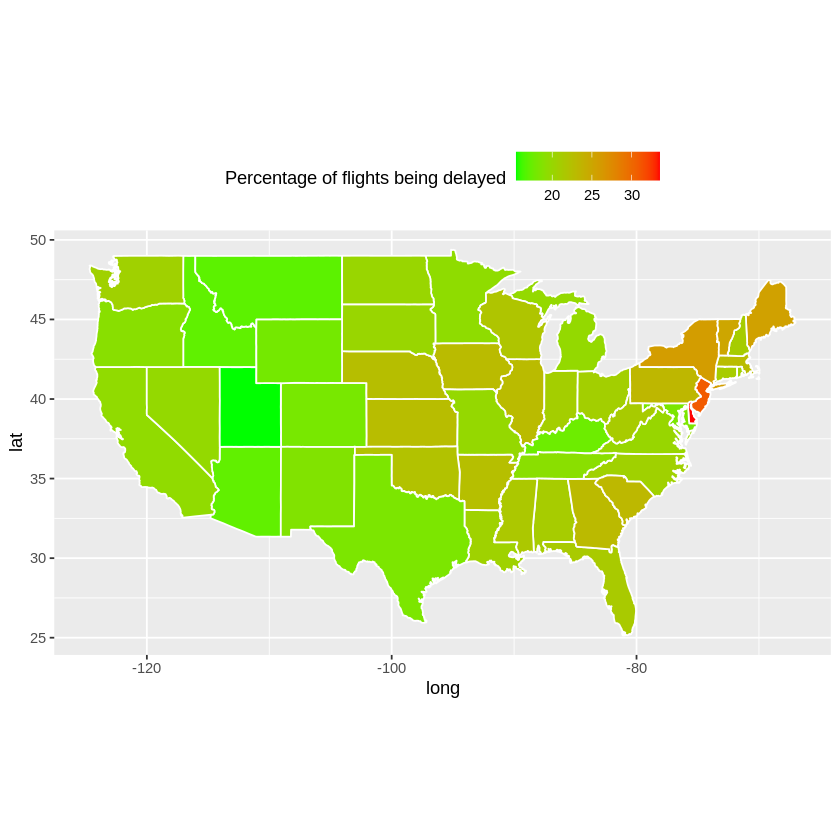

In [51]:
ggplot(data = states_with_data) + 
    geom_polygon(aes(x = long, y = lat, group = group, fill = delayed_ratio * 100), color = "white") +
    coord_fixed(1.3) +
    scale_fill_gradient(low="green", high="red") +
    labs(fill = "Percentage of flights being delayed")

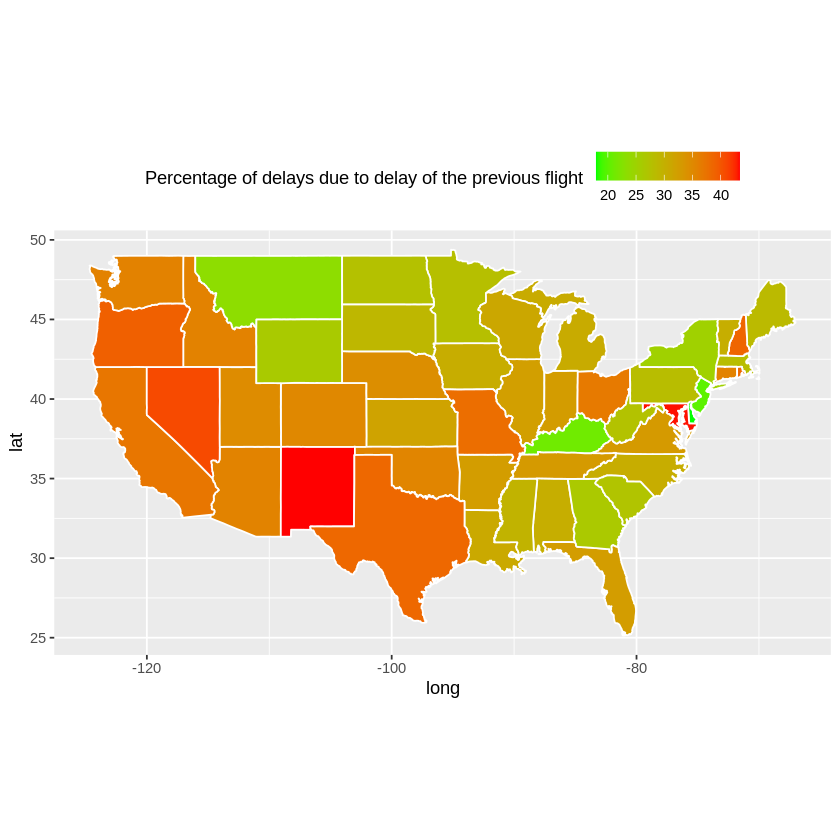

In [54]:
ggplot(data = states_with_data) + 
    geom_polygon(aes(x = long, y = lat, group = group, fill = total_late_aircraft_ct / total_delays * 100), color = "white") +
    coord_fixed(1.3) +
    scale_fill_gradient(low="green", high="red") +
    labs(fill = "Percentage of delays due to delay of the previous flight")

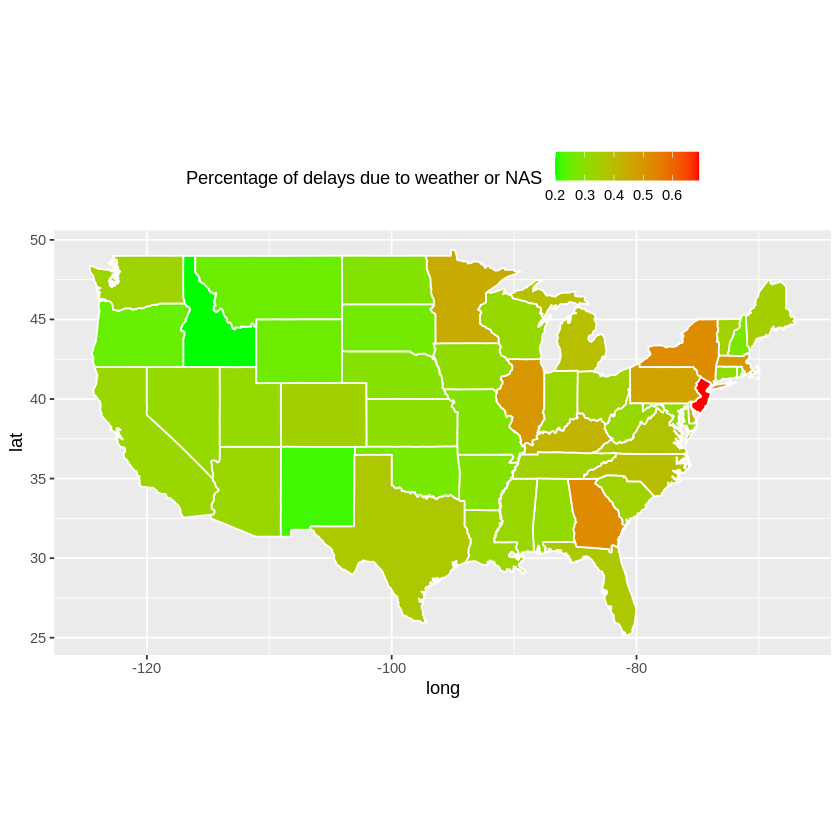

In [55]:
ggplot(data = states_with_data) + 
    geom_polygon(aes(x = long, y = lat, group = group, fill = (total_weather_ct + total_nas_ct) / total_delays), color = "white") +
    coord_fixed(1.3) +
    scale_fill_gradient(low="green", high="red") +
    labs(fill = "Percentage of delays due to weather or NAS")

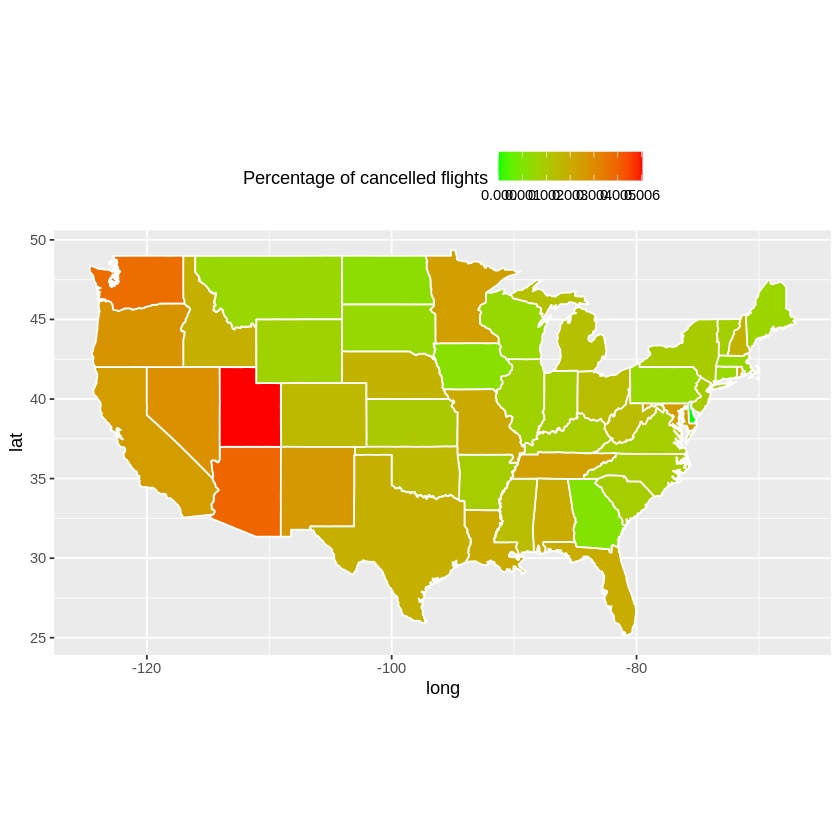

In [74]:
ggplot(data = states_with_data) + 
    geom_polygon(aes(x = long, y = lat, group = group, fill = cancelled_ratio), color = "white") +
    coord_fixed(1.3) +
    scale_fill_gradient(low="green", high="red") +
    labs(fill = "Percentage of cancelled flights")

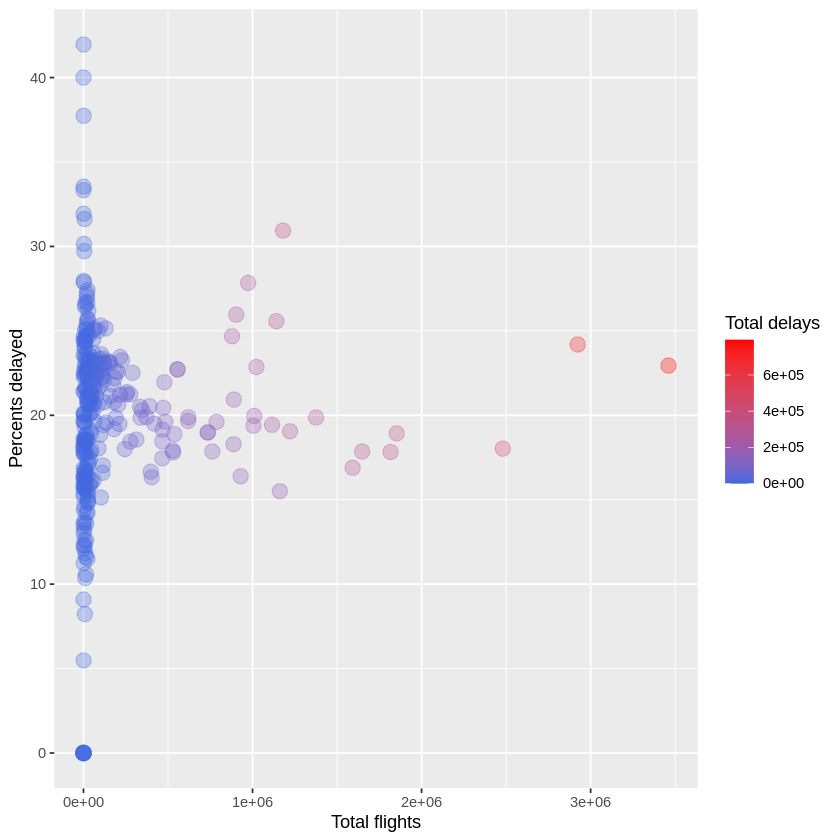

In [57]:
ggplot(df_by_airport, aes(x = total_flights, y = delayed_ratio * 100, color = total_delays)) +
    geom_point(size = 4, alpha = 0.3) +
    scale_color_gradient(low="royalblue", high="red") +
    theme(legend.position = "right") +
    labs(x = "Total flights", y = "Percents delayed", color = "Total delays")

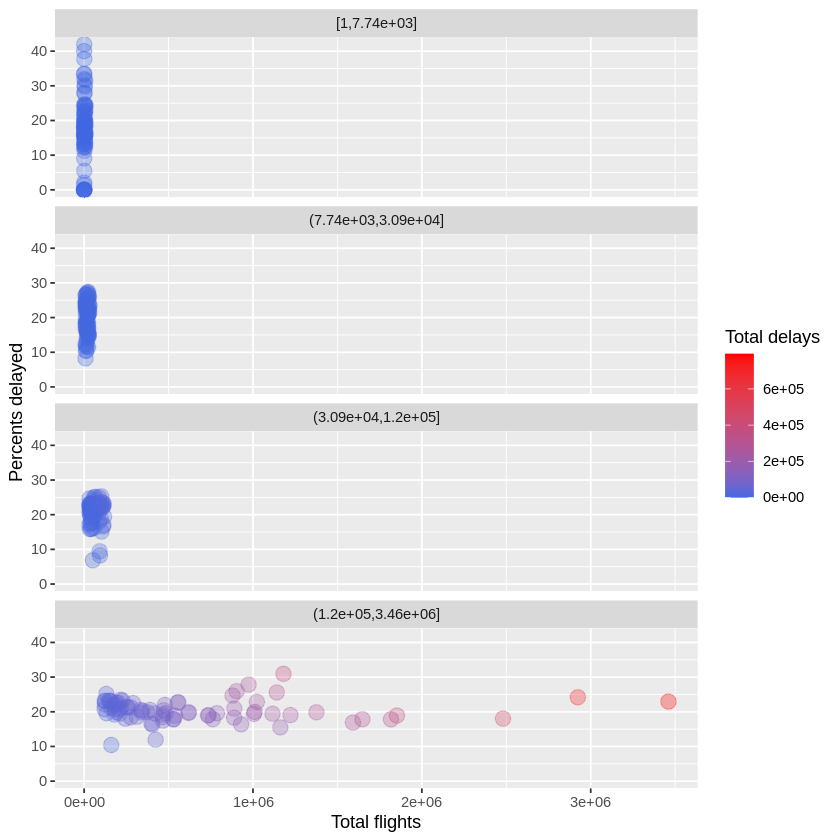

In [121]:
ggplot(df_by_airport, aes(x = total_flights, y = delayed_ratio * 100, color = total_delays)) +
    facet_wrap(~cut_number(total_flights, 4), ncol = 1) +
    geom_point(size = 4, alpha = 0.3) +
    scale_color_gradient(low="royalblue", high="red") +
    theme(legend.position = "right") +
    labs(x = "Total flights", y = "Percents delayed", color = "Total delays") 

In [73]:
df_by_airport %>% slice_max(total_flights, n = 200) %>% slice_max(total_late_aircraft_ct / total_delays, n = 5) %>%
mutate(temp = total_late_aircraft_ct / total_delays) %>% select(airport, state, city, total_flights, temp)


airport,state,city,total_flights,temp
DAL,TX,Dallas,403513,0.6033063
HRL,TX,Harlingen,44605,0.5703161
OAK,CA,Oakland,528158,0.5182774
HOU,TX,Houston,466473,0.5122136
BUR,CA,Burbank,244580,0.5032998


In [93]:
df_by_carrier %>% slice_max((total_late_aircraft_ct) / total_delays, n = 7) %>%

mutate(temp = 100 * (total_late_aircraft_ct) / total_delays) %>% select(carrier, carrier_name, total_flights, temp)

carrier,carrier_name,total_flights,temp
WN,Southwest Airlines Co.,9281815,54.41258
FL,AirTran Airways Corporation,1906087,42.70877
DH,Independence Air,568833,39.00354
MQ,American Eagle Airlines Inc.,4091886,37.46321
OO,SkyWest Airlines Inc.,4557292,35.12122
UA,United Air Lines Inc.,3701636,34.77813
AS,Alaska Airlines Inc.,964871,34.52419


## Southwest Airlines

In [161]:
wndf <- df %>% filter(carrier == "WN") %>% group_by(state, city, airport) %>% 
    summarise(
        total_flights = sum(arr_flights),
        total_delays = sum(arr_del15),
        delayed_ratio = total_delays / total_flights,
        total_carrier_ct = sum(carrier_ct),
        total_weather_ct = sum(X.weather_ct),
        total_nas_ct = sum(nas_ct),
        total_security_ct = sum(security_ct),
        total_late_aircraft_ct = sum(late_aircraft_ct),
        total_cancelled = sum(arr_cancelled),
        cancelled_ratio = total_cancelled / total_flights,
        total_diverted = sum(arr_diverted),
                total_delay = sum(X.arr_delay),
        .groups = "keep"
    ) %>%
    ungroup()
wndf <- merge(wndf, airports[, c("iata", "lat", "long")], by.x="airport", by.y="iata")
wndf <- add_state_name(wndf)

In [162]:
wndf %>% 
    slice_max(total_late_aircraft_ct / total_delays, n=10) %>% 
    mutate(delay_due_to_delay = 100 * total_late_aircraft_ct / total_delays) %>% 
    select(airport, city, state, total_flights, delay_due_to_delay)

airport,city,state,total_flights,delay_due_to_delay
CRP,Corpus Christi,TX,15611,66.60459
GEG,Spokane,WA,43350,66.35472
HRL,Harlingen,TX,32852,66.11814
SMF,Sacramento,CA,223237,65.76803
SJC,San Jose,CA,215566,65.44040
BOI,Boise,ID,52043,63.86088
DAL,Dallas,TX,360531,63.77709
TUS,Tucson,AZ,51476,63.58504
PDX,Portland,OR,112503,63.50160
LBB,Lubbock,TX,35846,62.87433


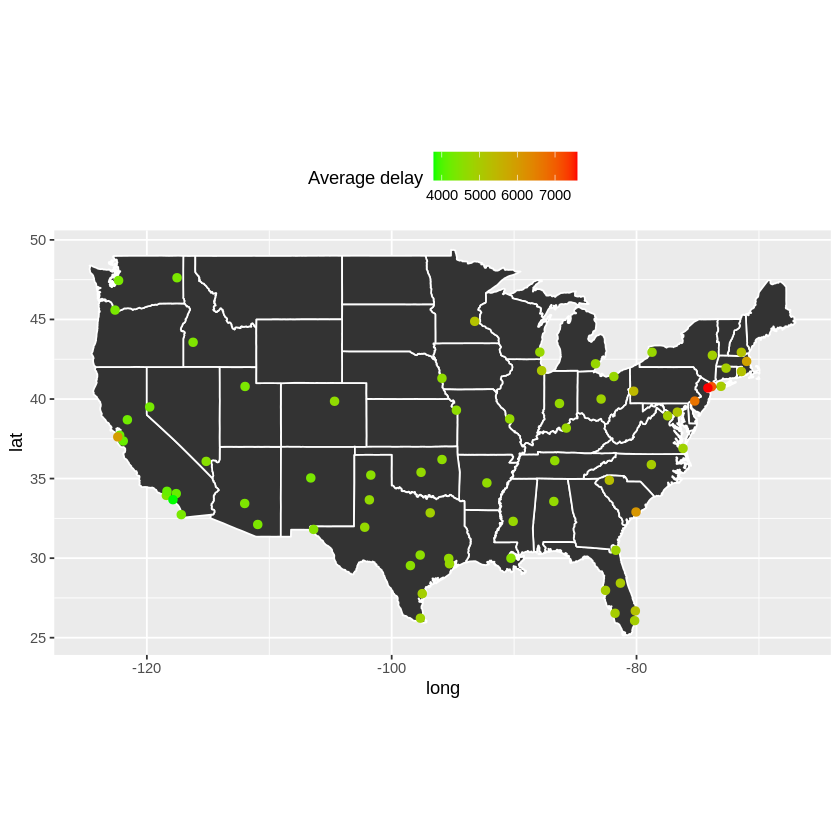

In [164]:
plot_map() +
    geom_point(data = wndf %>% slice_max(total_flights, n = 200), mapping = aes(x = long, y = lat, color = total_delay / total_delays * 100), size = 2) +
    scale_color_gradient(low="green", high="red") +
    guides(fill=FALSE) +
    labs(color = "Average delay")

In [109]:
summary(wndf)

    airport       state             city    total_flights     total_delays   
 ABQ    : 1   TX     :11   Houston    : 2   Min.   :  1598   Min.   :   273  
 ALB    : 1   CA     : 9   Albany     : 1   1st Qu.: 37315   1st Qu.:  7618  
 AMA    : 1   FL     : 6   Albuquerque: 1   Median : 69250   Median : 13702  
 AUS    : 1   NY     : 4   Amarillo   : 1   Mean   :128914   Mean   : 23241  
 BDL    : 1   AZ     : 2   Austin     : 1   3rd Qu.:161460   3rd Qu.: 30788  
 BHM    : 1   MO     : 2   Baltimore  : 1   Max.   :645286   Max.   :114727  
 (Other):66   (Other):38   (Other)    :65                                    
 delayed_ratio    total_carrier_ct  total_weather_ct   total_nas_ct     
 Min.   :0.1511   Min.   :  107.4   Min.   :   7.68   Min.   :   26.82  
 1st Qu.:0.1775   1st Qu.: 2165.8   1st Qu.: 159.01   1st Qu.:  964.94  
 Median :0.1898   Median : 4265.3   Median : 280.00   Median : 1985.12  
 Mean   :0.1950   Mean   : 5882.5   Mean   : 585.28   Mean   : 4019.57  
 3rd Qu.:0.

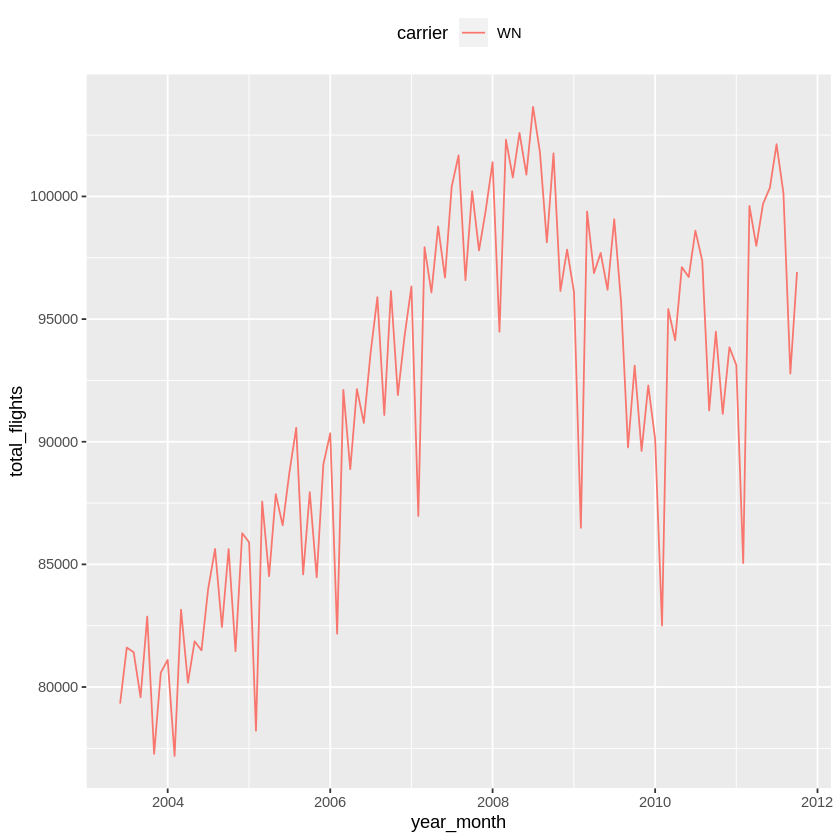

In [159]:
ggplot(data = df_by_carrier_per_year_month %>% filter(carrier == "WN")) +
    geom_line(aes(x = year_month, y = total_flights, color = carrier))

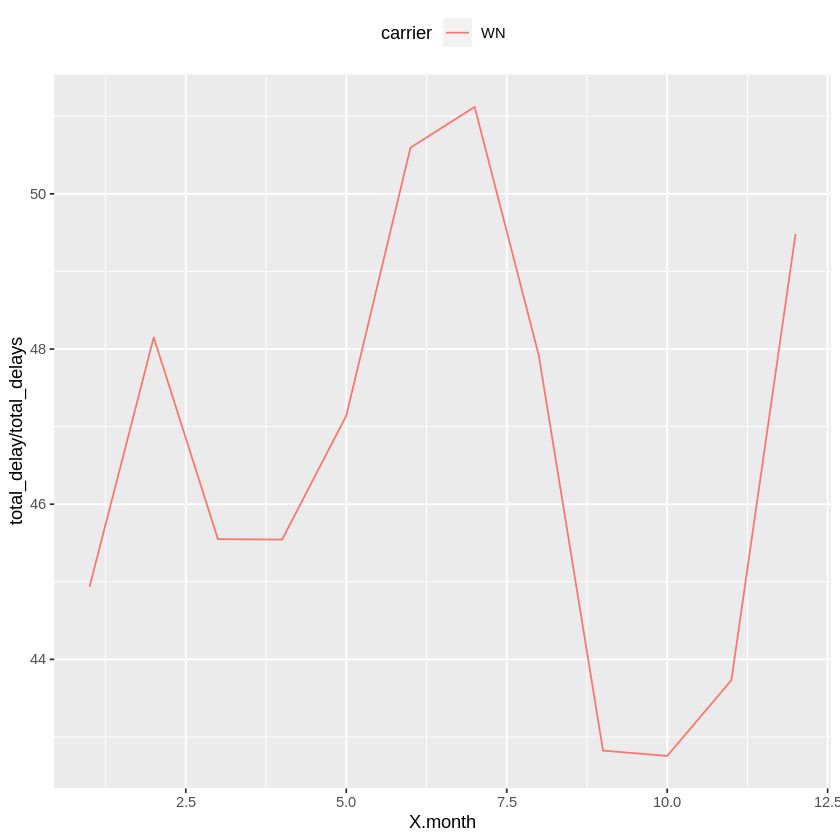

In [160]:
ggplot(data = df_by_carrier_per_month %>% filter(carrier == "WN")) +
    geom_line(aes(x = X.month, y = total_delay / total_delays, color = carrier))

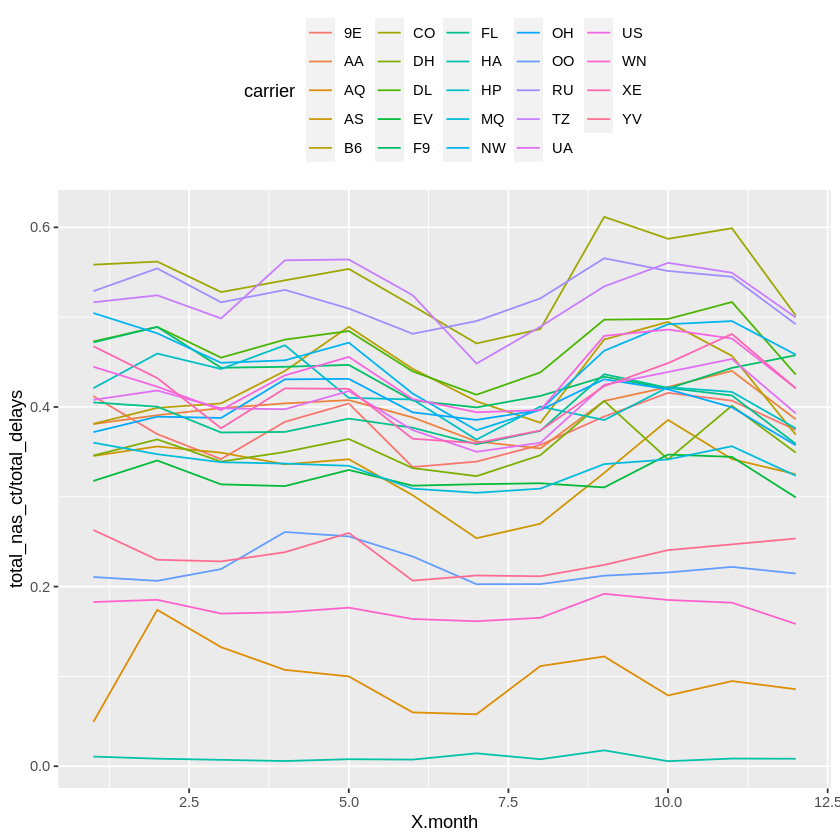

In [141]:
ggplot(data = df_by_carrier_per_month) +
    geom_line(aes(x = X.month, y = total_nas_ct / total_delays, color = carrier))

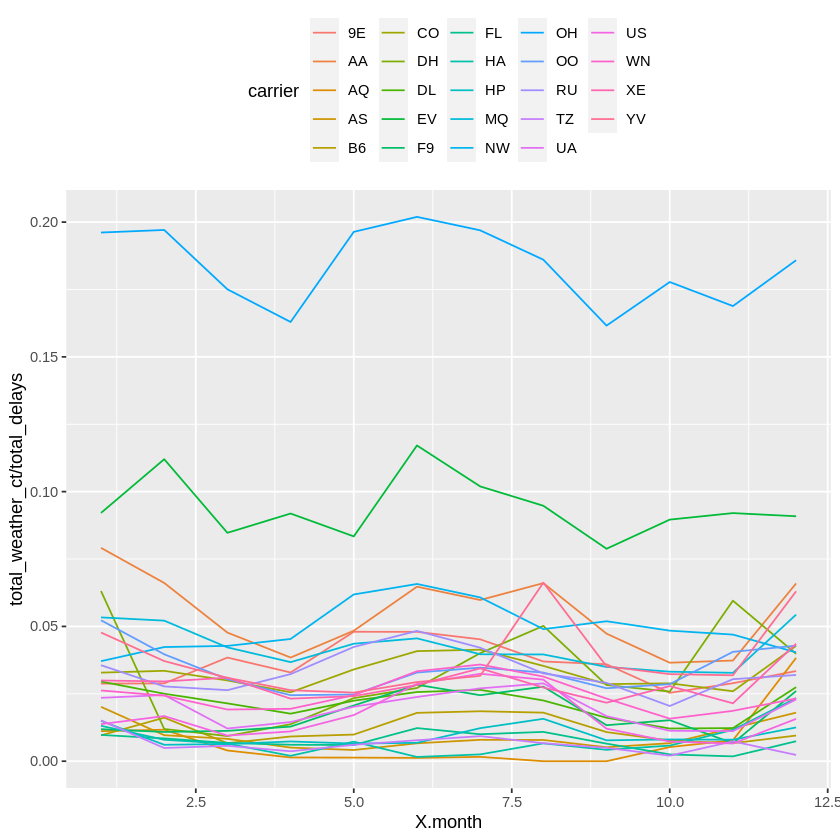

In [140]:
ggplot(data = df_by_carrier_per_month) +
    geom_line(aes(x = X.month, y = total_weather_ct / total_delays, color = carrier))

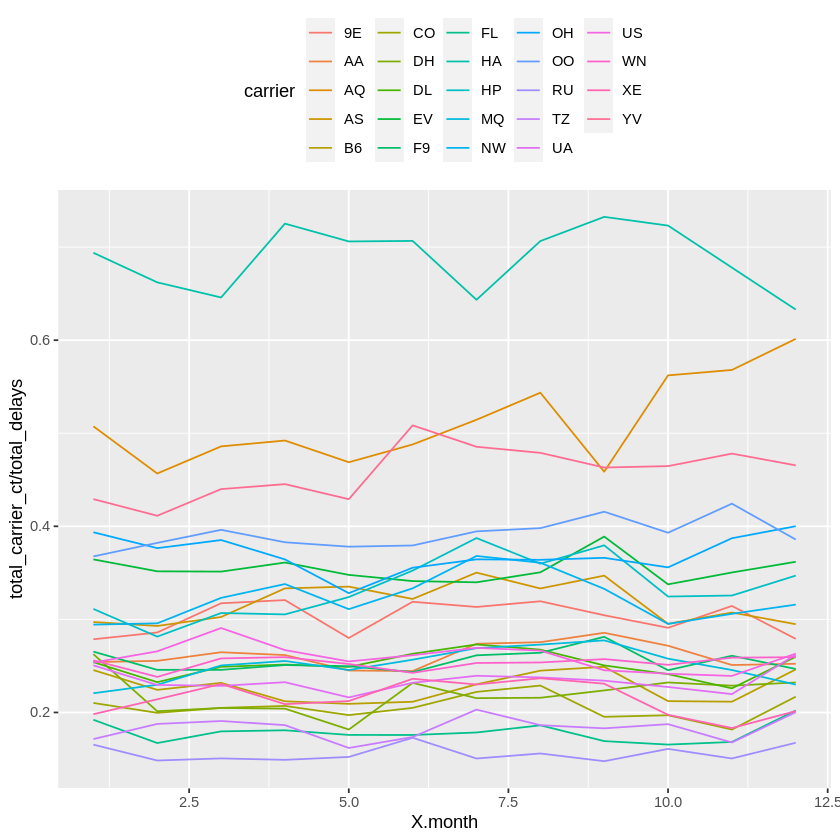

In [142]:
ggplot(data = df_by_carrier_per_month) +
    geom_line(aes(x = X.month, y = total_carrier_ct / total_delays, color = carrier))

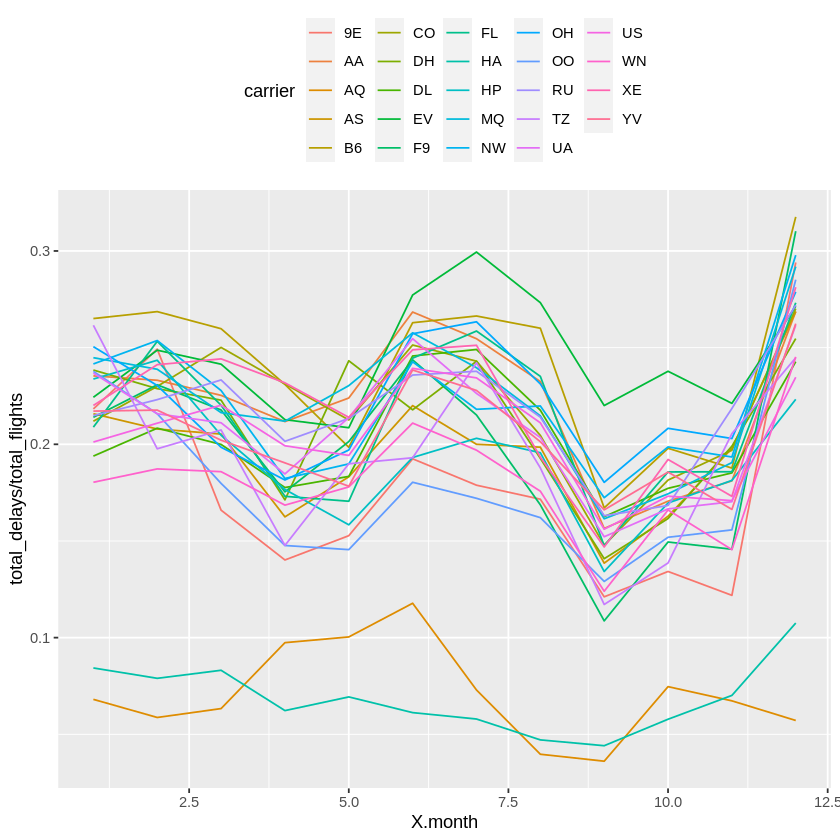

In [139]:
ggplot(data = df_by_carrier_per_month) +
    geom_line(aes(x = X.month, y = total_delays / total_flights, color = carrier))

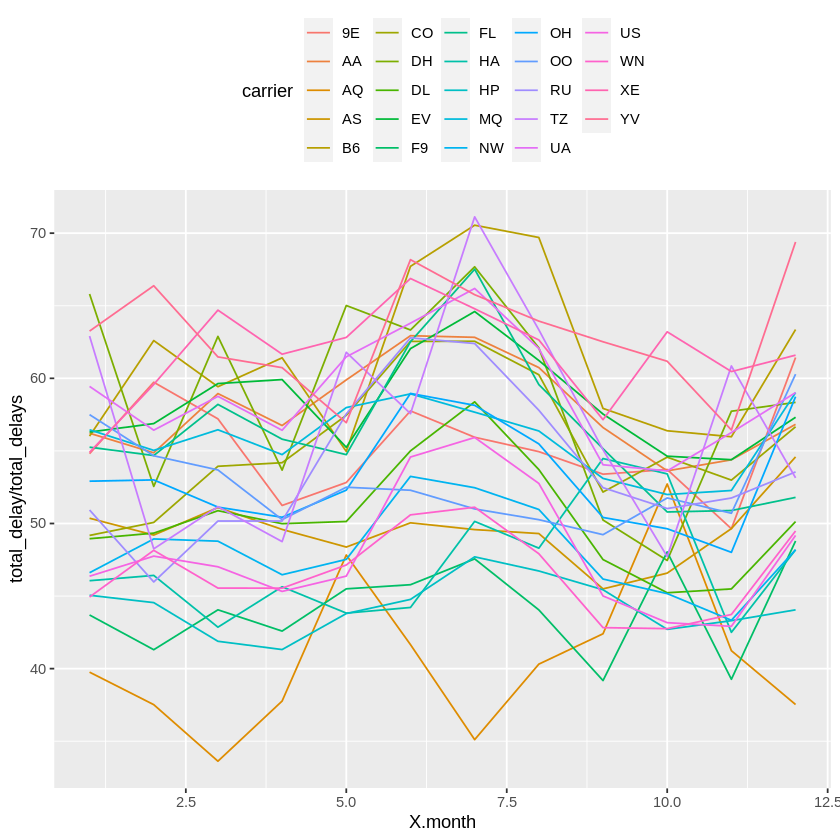

In [154]:
ggplot(data = df_by_carrier_per_month) +
    geom_line(aes(x = X.month, y = total_delay / total_delays, color = carrier))